In [1]:
import numpy as np 
import pandas as pd 
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [2]:
#Loading the dataset
df=pd.read_csv("/Users/miguelvillanueva/Documents/Projects/McDonald's Menu/menu.csv")
df.head()

Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0                             25        0.0  ...             31   
1                             15        0.0  ...             30   
2                             42        0.0  ...             29   
3                             52        0.0  ...             30   
4                             42        0.0  ...             30   

   Carbohydrates (% Daily Value)  Dietary Fiber  \
0                             10              4   
1                             10              4   
2                             10              4   
3                             10              4   
4                             10              4   

   Dietary Fiber (% Daily Value)  Sugars  Protein  Vitamin A (% Daily Value)  \
0                             17       3       17                         10   
1                             17       3       18                          6   
2                             17       2       14                          8   
3                             17       2       21                         15   
4                             17       2       21                          6   

   Vitamin C (% Daily Value)  Calcium (% Daily Value)  Iron (% Daily Value)  
0                          0                       25                    15  
1                          0                       25                     8  
2                          0                       25                    10  
3                          0                       30                    15  
4                          0                       25                    10  

[5 rows x 24 columns]

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

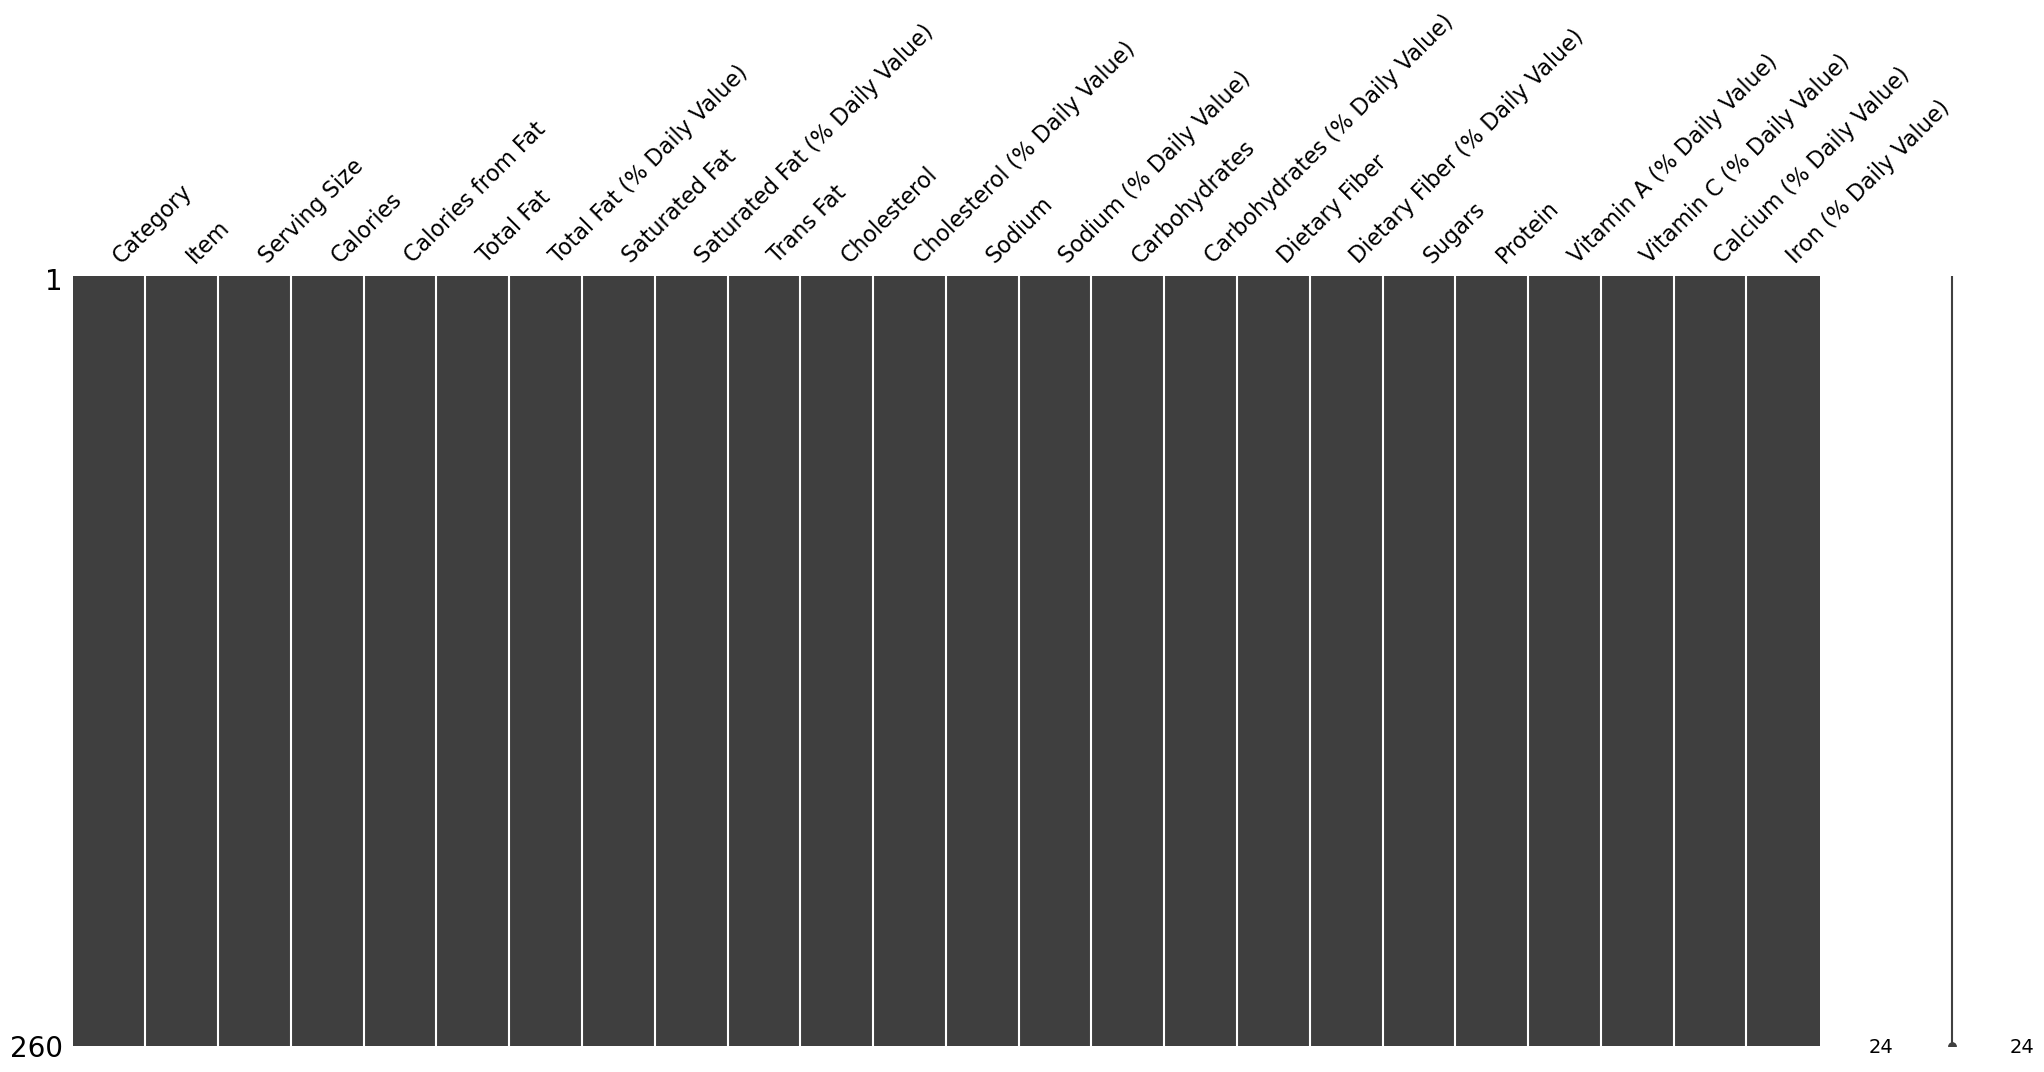

In [3]:
#Checking for null values
msno.matrix(df)
df.isna().sum()

In [4]:
#Unique values in category column
df.Category.unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

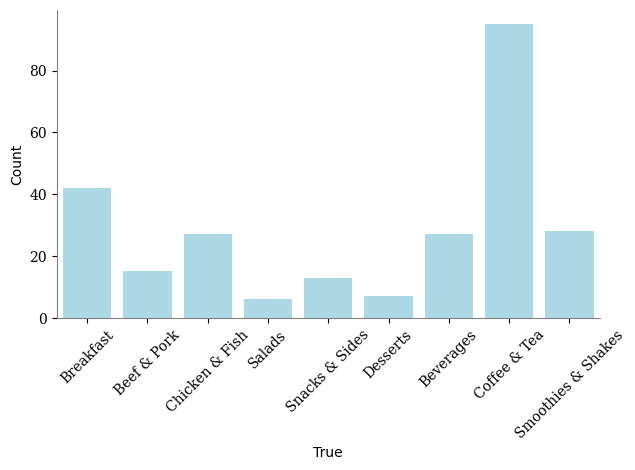

In [5]:
#Coffee and tea has been consumed heavily by customers

plt.style.use('default')
plt.figure(figsize=(7,4),edgecolor='0.1',dpi=100)
a=sns.countplot(x='Category',facecolor='lightblue',data=df)


xticks=plt.xticks(rotation=45,family='serif')
yticks=plt.yticks(family='serif')

plt.xlabel(df['Category'].all())
plt.ylabel('Count')

a.spines['bottom'].set_color('gray')
a.spines['left'].set_color('gray')
sns.despine()

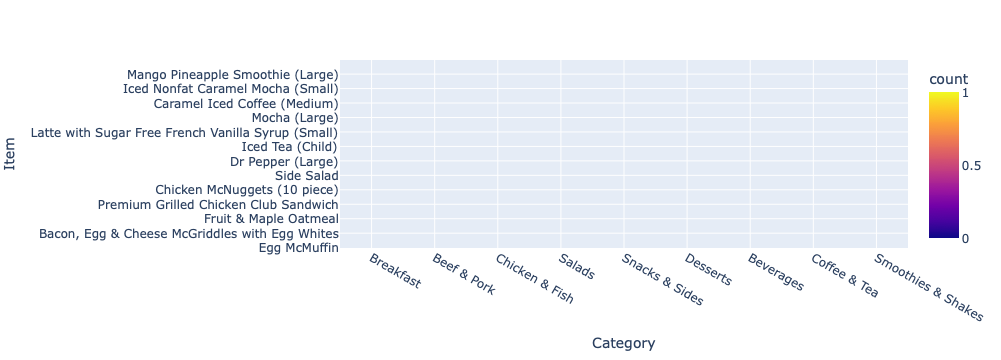

In [13]:
#Analysis of number of items per category
px.density_heatmap(x='Category',y='Item',data_frame=df,width=900)

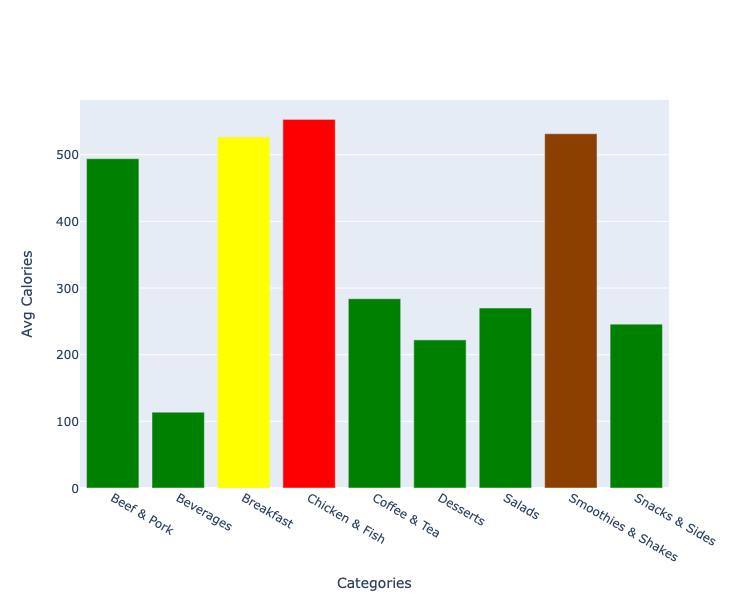

In [26]:
#Analysis of Nutrients 
calories=pd.DataFrame(df.groupby('Category')['Calories'].mean())

colors = ['green']*9
colors[3]='red'
colors[2]='yellow'
colors[7]='#8B4000'

fig = go.Figure(data=[go.Bar(
    x=calories.index,
    y=calories['Calories'],
    marker_color=colors
)])
fig.update_layout(width=750,height=600)
fig.update_yaxes(title='Avg Calories')
fig.update_xaxes(title='Categories')
fig.show()

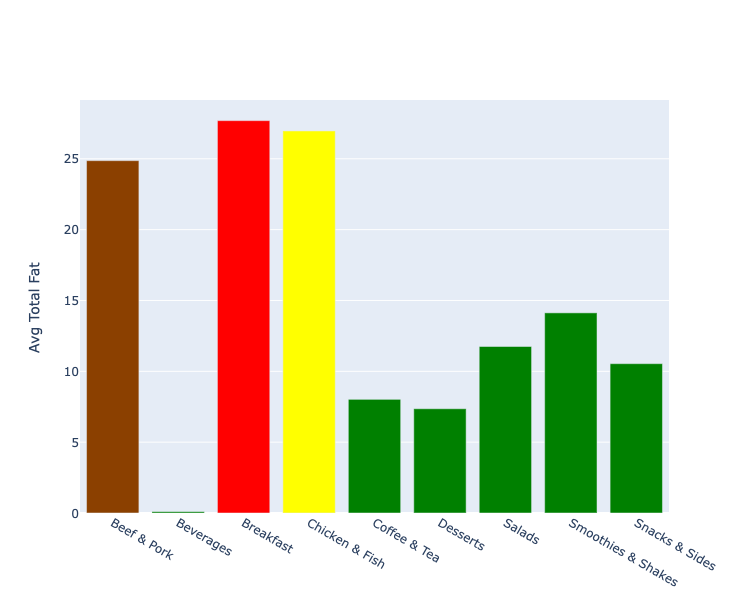

In [31]:
#Analysis of Fat
fat=pd.DataFrame(df.groupby('Category')['Total Fat'].mean())

colors = ['green']*9
colors[2]='red'
colors[3]='yellow'
colors[0]='#8B4000'

fig = go.Figure(data=[go.Bar(
    x=fat.index,
    y=fat['Total Fat'],
    marker_color=colors
)])
fig.update_layout(width=750,height=600)
fig.update_yaxes(title='Avg Total Fat')
fig.show()

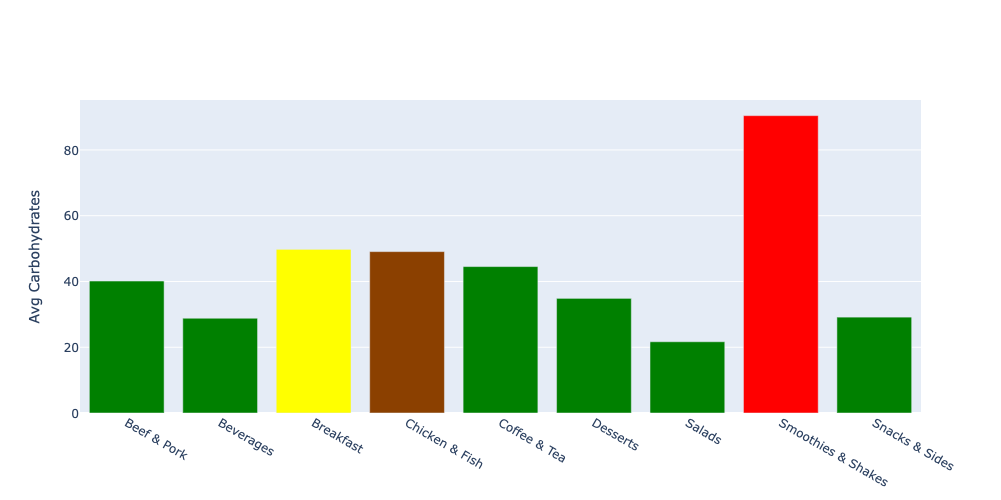

In [9]:
#Analysis of Carbohydrates
carbs=pd.DataFrame(df.groupby('Category')['Carbohydrates'].mean())
        
colors=['green']*9
colors[7]='red'
colors[2]='yellow'
colors[3]='#8B4000'

fig = go.Figure(data=[go.Bar(
    x=carbs.index,
    y=carbs['Carbohydrates'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Carbohydrates')
fig.update_layout(width=700,height=500)
fig.show()

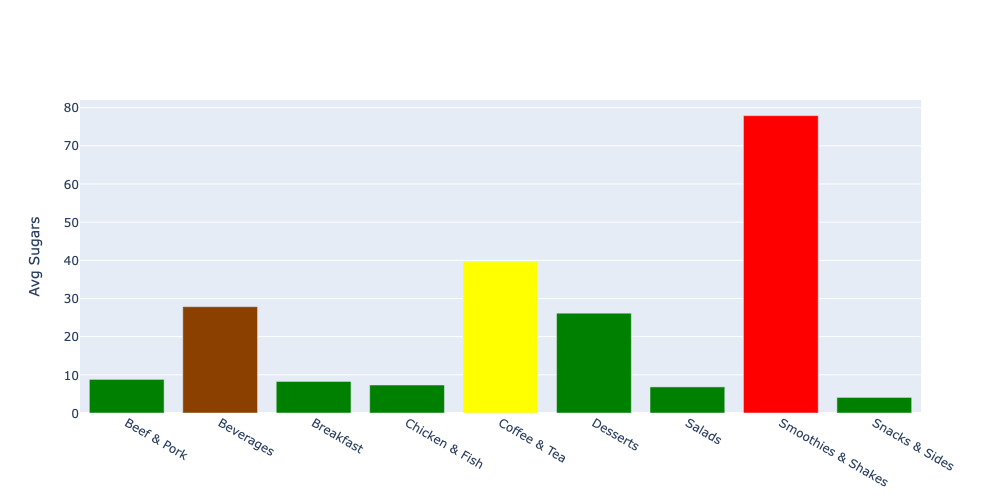

In [14]:
#Analysis of Sugars
sugars=pd.DataFrame(df.groupby('Category')['Sugars'].mean())
        
colors=['green']*9
colors[7]='red'
colors[4]='yellow'
colors[1]='#8B4000'

fig = go.Figure(data=[go.Bar(
    x=sugars.index,
    y=sugars['Sugars'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Sugars')
fig.update_layout(width=700,height=500)
fig.show()


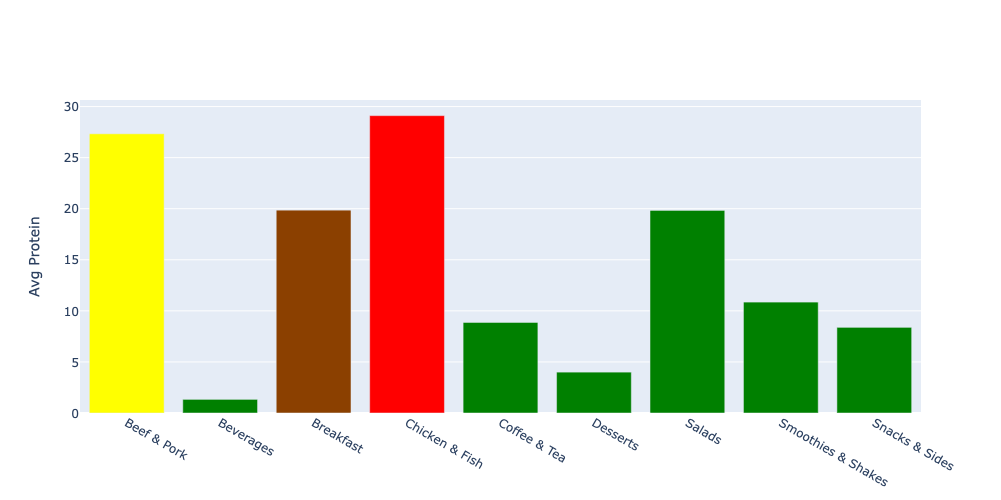

In [24]:
#Analysis of Protein
protein=pd.DataFrame(df.groupby('Category')['Protein'].mean())
        
colors=['green']*9
colors[3]='red'
colors[0]='yellow'
colors[2]='#8B4000'

fig = go.Figure(data=[go.Bar(
    x=protein.index,
    y=protein['Protein'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Protein')
fig.update_layout(width=700,height=500)
fig.show()

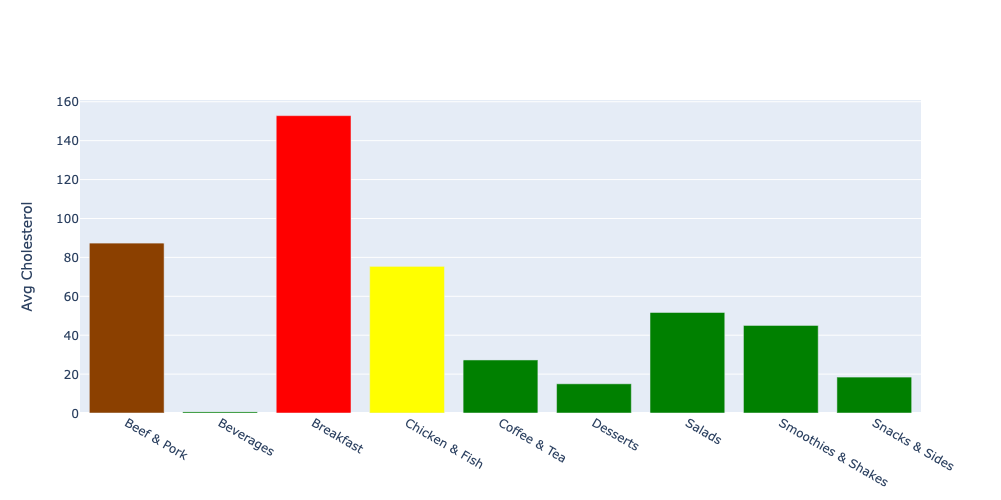

In [25]:
#Analysis of Cholesterol
chol=pd.DataFrame(df.groupby('Category')['Cholesterol'].mean())
        
colors=['green']*9
colors[2]='red'
colors[3]='yellow'
colors[0]='#8B4000'

fig = go.Figure(data=[go.Bar(
    x=chol.index,
    y=chol['Cholesterol'],
    marker_color=colors
)])
fig.update_yaxes(title='Avg Cholesterol')
fig.update_layout(width=700,height=500)
fig.show()

Text(0.5, 1.05, 'Carbohydrates vs Sugars')

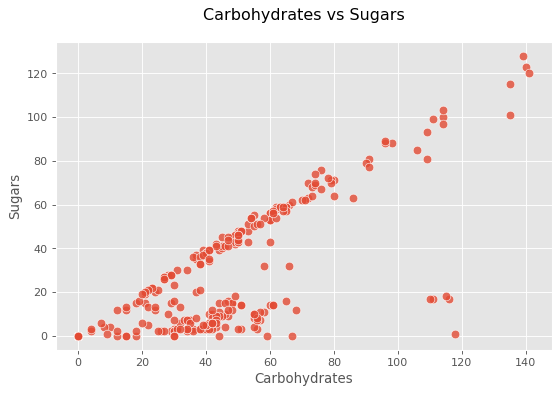

In [26]:
#Analysis of how Carbohydrates and Sugars are related
plt.style.use('ggplot')
plt.figure(figsize=(8,5),dpi=80)
sns.scatterplot(x='Carbohydrates',y='Sugars',data=df,alpha=0.8,s=60)
plt.title('Carbohydrates vs Sugars',x=0.5,y=1.05)

In [28]:
#Analysis of Average Nutrient(% Daily Value) for each categories
cols=['Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)',
      'Iron (% Daily Value)','Total Fat (% Daily Value)',
      'Cholesterol (% Daily Value)','Carbohydrates (% Daily Value)']

table=df.pivot_table(columns='Category',values=cols)
table.style.background_gradient(cmap='viridis')

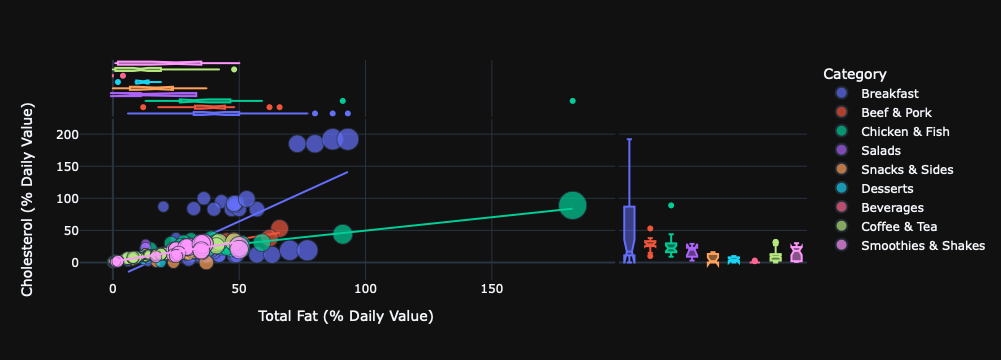

In [30]:
import plotly.express as px
#df = px.data.menu()
fig = px.scatter(df, x="Total Fat (% Daily Value)",y='Cholesterol (% Daily Value)', color="Category",
                 size='Calories', hover_name="Item",trendline="ols",
                 template="plotly_dark",marginal_x="box",marginal_y="box")
fig.show()

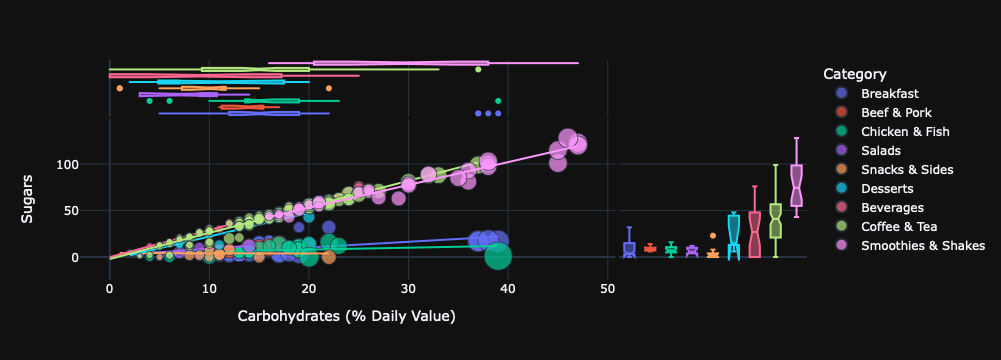

In [31]:
fig = px.scatter(df, x="Carbohydrates (% Daily Value)",y='Sugars', color="Category",
                 size='Calories', hover_name="Item",trendline="ols",
                 template="plotly_dark",marginal_x="box",marginal_y="box")
fig.show()

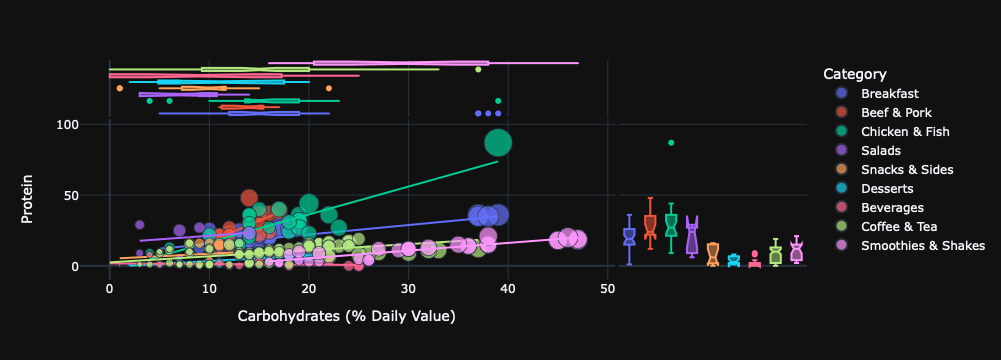

In [32]:
fig = px.scatter(df, x="Carbohydrates (% Daily Value)",y='Protein', color="Category",
                 size='Calories', hover_name="Item",trendline="ols",template="plotly_dark",
                 marginal_x="box",marginal_y="box")
fig.show()

/Users/miguelvillanueva/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning:

invalid value encountered in double_scalars



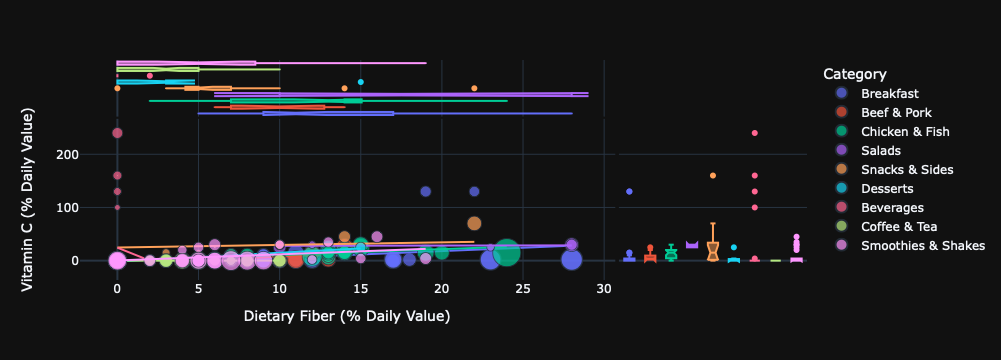

In [35]:
fig = px.scatter(df, x='Dietary Fiber (% Daily Value)',y='Vitamin C (% Daily Value)', color="Category",
                 size='Calories',  hover_name="Item",
                 trendline="ols",template="plotly_dark",marginal_x="box",marginal_y="box")
fig.show()

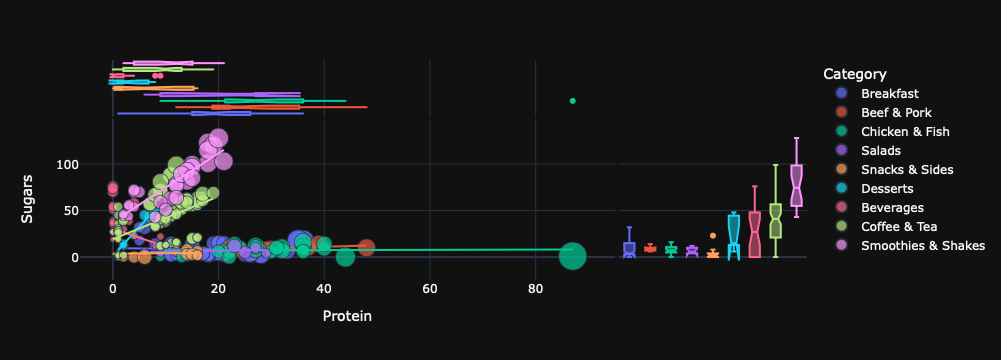

In [36]:
fig = px.scatter(df, x='Protein',y='Sugars', color="Category",size='Calories',
                 hover_name="Item",trendline="ols",template="plotly_dark",marginal_x="box",marginal_y="box")
fig.show()

In [37]:
#Analysing items with highest amount of nutrients in the menu
breakfast=df[df['Category']=='Beef & Pork']
cols=['Calories','Total Fat','Carbohydrates','Sodium','Protein','Dietary Fiber']
for col in cols:
    print(col)
    a=breakfast.groupby('Item')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')

Calories
Item
Double Quarter Pounder with Cheese    750
Name: Calories, dtype: int64
----------------------------------------


Total Fat
Item
Double Quarter Pounder with Cheese    43.0
Name: Total Fat, dtype: float64
----------------------------------------


Carbohydrates
Item
Bacon Clubhouse Burger    51
Name: Carbohydrates, dtype: int64
----------------------------------------


Sodium
Item
Bacon Clubhouse Burger    1470
Name: Sodium, dtype: int64
----------------------------------------


Protein
Item
Double Quarter Pounder with Cheese    48
Name: Protein, dtype: int64
----------------------------------------


Dietary Fiber
Item
Bacon Clubhouse Burger    4
Name: Dietary Fiber, dtype: int64
----------------------------------------


